In [3]:
# Data manipulation and machine learning
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, silhouette_samples

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
data = pd.read_csv('cleaned_CKD_dataset.csv')

# Optional: Drop any target or non-numeric columns if they exist (like the 'Class' column if it's for supervised learning)
if 'Class' in data.columns:
    data = data.drop('Class', axis=1)
    
# Check the data
print(data.head())


     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  137.53  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  
0  1.0  
1  0.0  
2  0.0  
3  1.0  
4  0.0  


In [6]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Convert to a DataFrame for easier plotting
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
print(data_pca_df.head())


           PC1        PC2
0  -606.106106 -14.981317
1 -2406.126786 -32.523209
2  -906.086878   2.514800
3 -1706.084694   5.842370
4 -1106.115300 -24.252254


In [7]:
# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Convert to DataFrame for easier plotting
data_tsne_df = pd.DataFrame(data_tsne, columns=['t-SNE1', 't-SNE2'])
print(data_tsne_df.head())


      t-SNE1    t-SNE2
0 -12.587921  3.507552
1 -30.254648  0.153784
2 -15.518661  3.584457
3 -24.123226  2.216100
4 -17.298679  3.387774


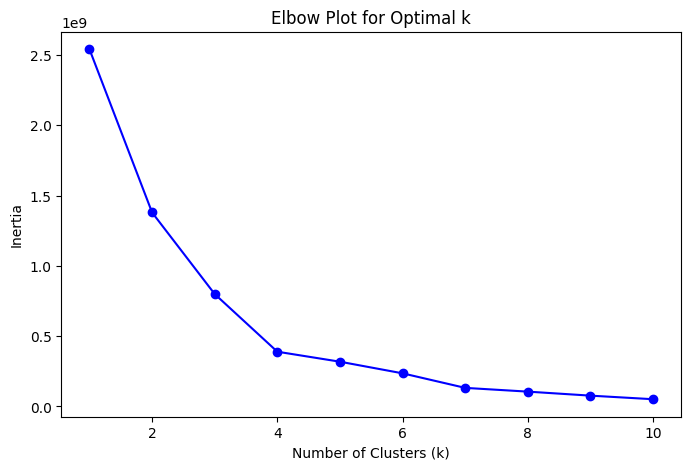

In [8]:
# Calculate inertia for different numbers of clusters
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.show()


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Replace 3 with your chosen number of clusters
data['Cluster'] = kmeans.fit_predict(data)

# Calculate the silhouette score
sil_score = silhouette_score(data, data['Cluster'])
print(f'Silhouette Score: {sil_score:.2f}')



Silhouette Score: 0.51


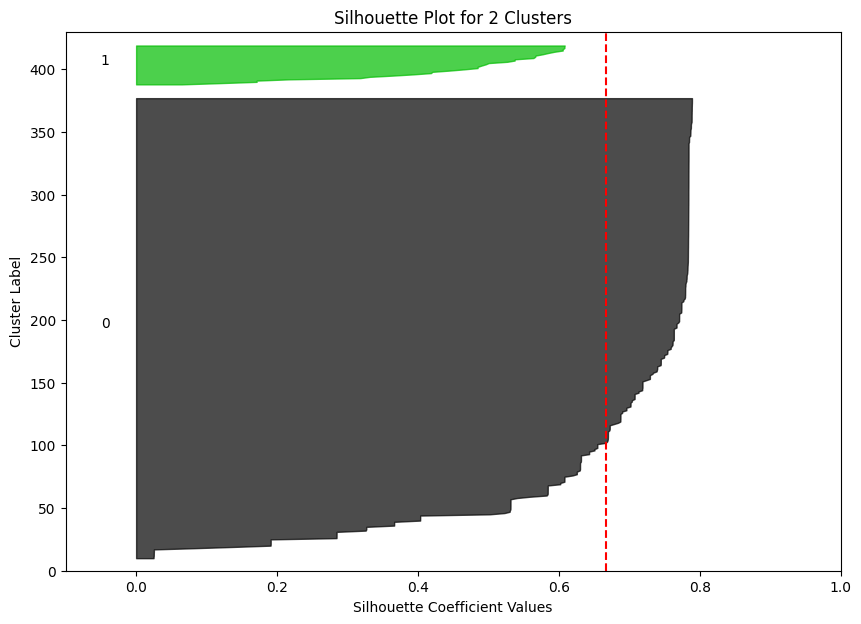

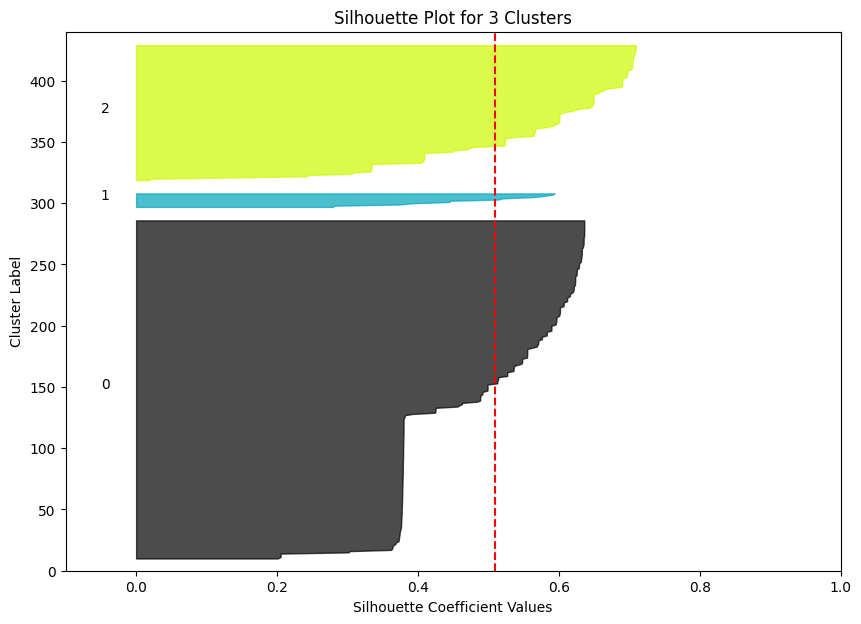

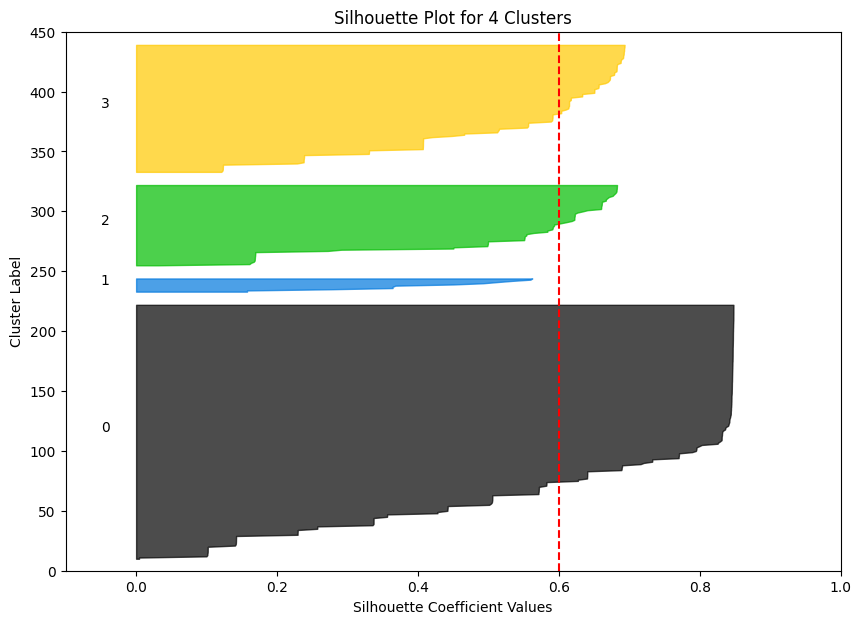

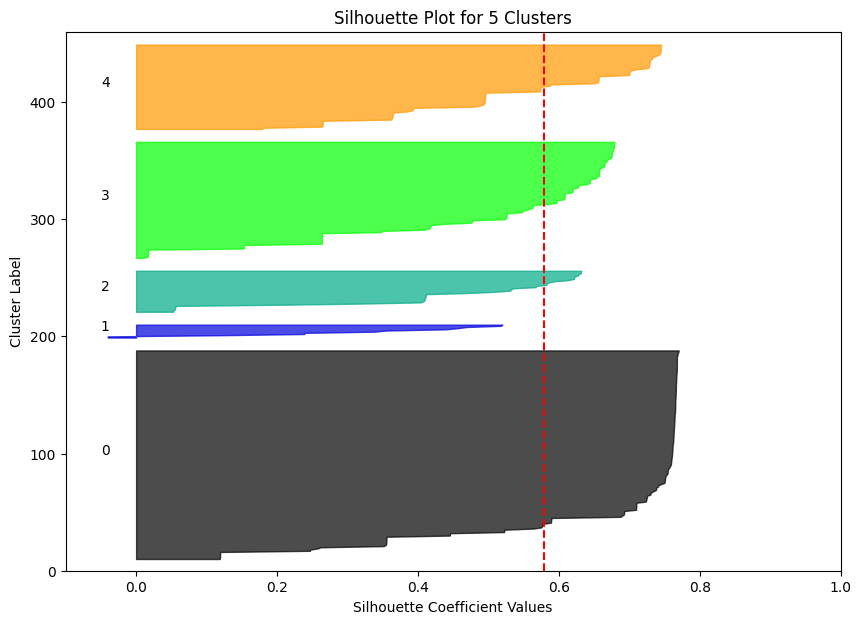

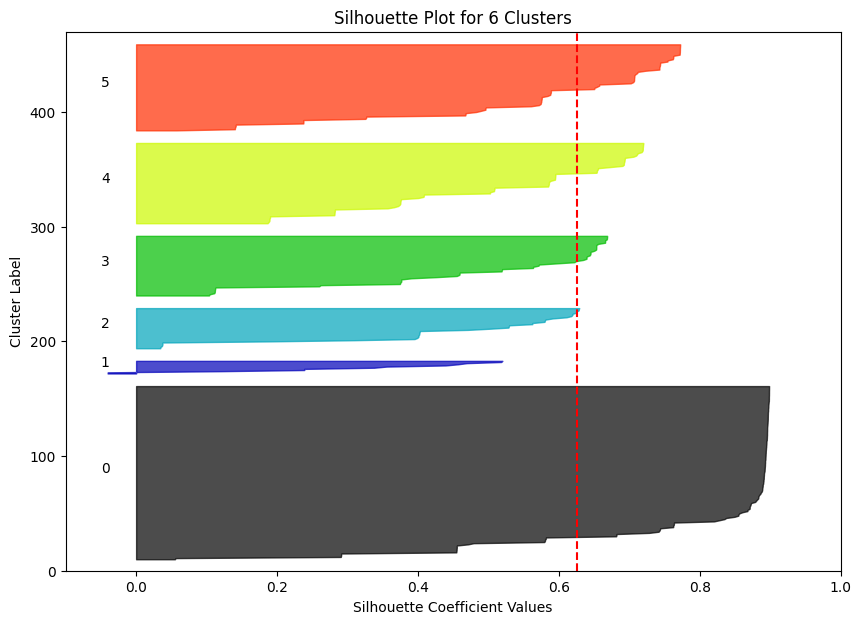

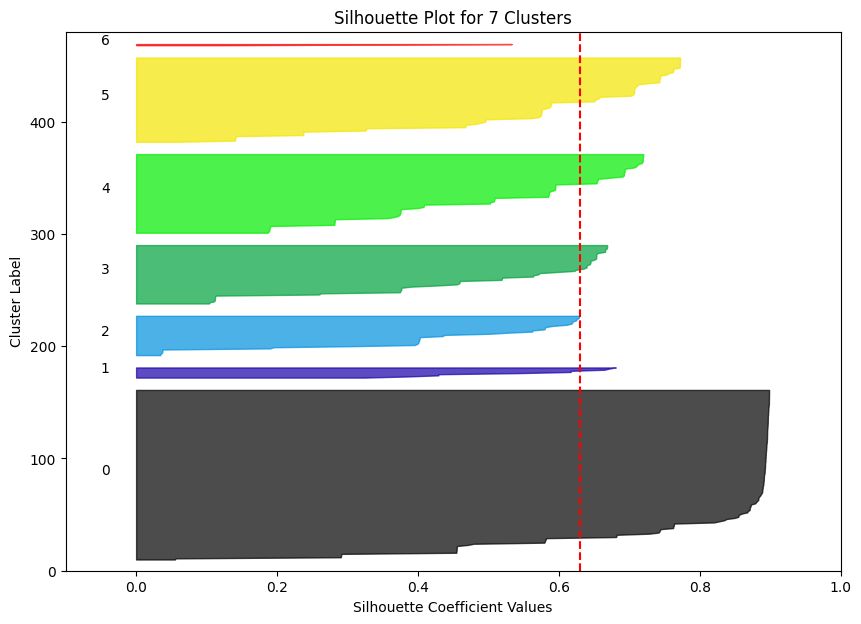

Average Silhouette Scores for each cluster size:
2 Clusters: 0.667
3 Clusters: 0.510
4 Clusters: 0.600
5 Clusters: 0.580
6 Clusters: 0.625
7 Clusters: 0.630


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Set range for number of clusters to try
cluster_range = range(2, 8)  # Adjust this range as needed

# Dictionary to store silhouette scores for each k
silhouette_avg_scores = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    
    # Calculate average silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_avg_scores[n_clusters] = silhouette_avg

    # Plot silhouette analysis for each cluster
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(data) + (n_clusters + 1) * 10])
    
    # Silhouette score per sample
    sample_silhouette_values = silhouette_samples(data, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    ax.set_title(f"Silhouette Plot for {n_clusters} Clusters")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.show()

# Display average silhouette scores for each cluster size
print("Average Silhouette Scores for each cluster size:")
for k, v in silhouette_avg_scores.items():
    print(f"{k} Clusters: {v:.3f}")



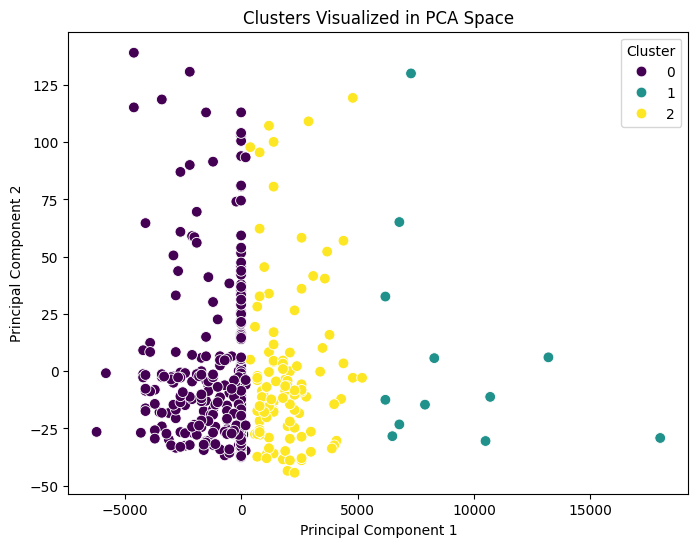

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns

# Perform K-means with optimal clusters (use a value from silhouette or elbow analysis, e.g., n_clusters=3)
optimal_clusters = 3  # Replace with your chosen k
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data)

# PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.drop('Cluster', axis=1))
data_pca_df = pd.DataFrame(data_pca, columns=['PC1', 'PC2'])
data_pca_df['Cluster'] = data['Cluster']

# Plot the clusters in PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_pca_df, palette='viridis', s=60)
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


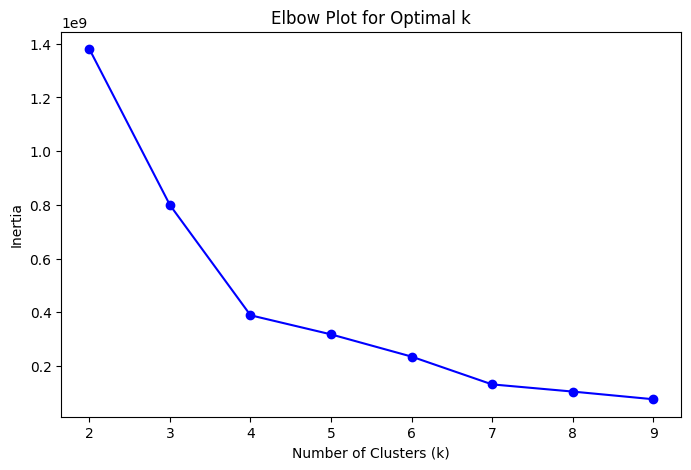

In [14]:
# Calculate inertia for different numbers of clusters
inertia = []
K = range(2, 10)  # Adjust this range as needed

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Optimal k')
plt.show()


In [15]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Score
db_score = davies_bouldin_score(data.drop('Cluster', axis=1), data['Cluster'])
print(f'Davies-Bouldin Score: {db_score:.3f}')


Davies-Bouldin Score: 0.617
